In [1]:
from env import HaloCatalog
import matplotlib.pyplot as plt
import numpy as np
import plot_utils as pt
import importlib
import h5py
import pandas as pd

In [2]:
%%time
simulation = 'GR'
snapnum = 99
halocat = HaloCatalog( simulation,snapnum)

trying file /cosma5/data/dp004/dc-cues1/TNG300-1/snapdir_/snap_099.0
trying file /cosma5/data/dp004/dc-cues1/TNG300-1/snapdir_/snap_099.0.hdf5
trying file /cosma5/data/dp004/dc-cues1/TNG300-1/snapdir_099/snap_099.0
trying file /cosma5/data/dp004/dc-cues1/TNG300-1/snapdir_099/snap_099.0.hdf5
trying file /cosma5/data/dp004/dc-cues1/TNG300-1//snap_099.0
trying file /cosma5/data/dp004/dc-cues1/TNG300-1//snap_099.0.hdf5
trying file /cosma5/data/dp004/dc-cues1/TNG300-1/099/snap_099.0
trying file /cosma5/data/dp004/dc-cues1/TNG300-1/099/snap_099.0.hdf5
Headername: /cosma5/data/dp004/dc-cues1/TNG300-1/snapdir_099/snap_099.0.hdf5
Sanpname: /cosma5/data/dp004/dc-cues1/TNG300-1/snapdir_099/snap_099
Minimum stellar mass : 1.00E+09
Minimum DM halo mass : 3.98E+09
Reading['GroupMass', 'Group_M_Crit200', 'Group_R_Crit200', 'GroupMassType', 'GroupNsubs', 'GroupLenType', 'GroupPos', 'GroupCM', 'SubhaloCM', 'SubhaloMassType', 'SubhaloMass', 'SubhaloVelDisp', 'SubhaloVmax', 'GroupFirstSub', 'SubhaloHalfm

/cosma/home/dp004/dc-cues1/environment/env.py:76: RuntimeWarning: divide by zero encountered in log10
  self.logM_stars = np.log10(self.M_stars)


4143747 resolved halos found.
CPU times: user 45min 26s, sys: 1min 21s, total: 46min 48s
Wall time: 7min 4s


# Overall Numbers

Some numbers describing the dataset. Resolved halos are defined as those containing at least 100 dark matter. particles

In [3]:
print('There are %d resolved Dark Matter central halos'%halocat.N_halos)
print('There are %d resolved central galaxies'%np.sum(halocat.N_gals))

zero_gals = np.sum(halocat.N_gals == 0)
print('There are %d halos with zero galaxies, which means %d percent of them'%(zero_gals,
                                                        100 * zero_gals/halocat.N_halos))


There are 4143747 resolved Dark Matter central halos
There are 283956 resolved central galaxies
There are 3980365 halos with zero galaxies, which means 96 percent of them


In [4]:
importlib.reload(pt)

<module 'plot_utils' from '/cosma/home/dp004/dc-cues1/environment/plot_utils.py'>

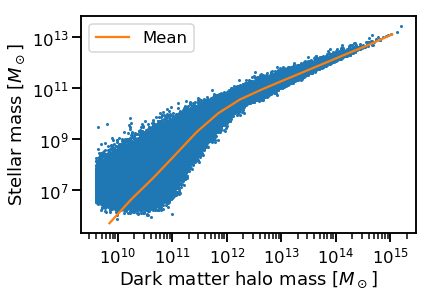

In [5]:
xlabel = 'Dark matter halo mass $[M_\odot]$'
ylabel = 'Stellar mass $[M_\odot]$'
pt.plot_mean(halocat.m200c, halocat.M_stars, xlabel, ylabel)

Text(0.5,0,'Number of galaxies per central halo')

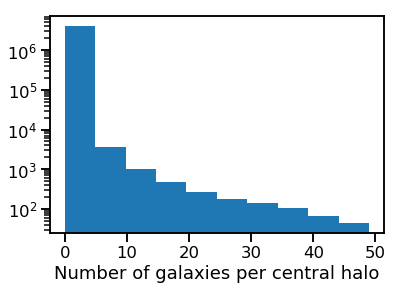

In [6]:
plt.hist(halocat.N_gals[halocat.N_gals < 50], log=True)
plt.xlabel('Number of galaxies per central halo')

## Add some extra features

In [7]:
halocat.compute_x_offset()
halocat.compute_fsub_unbound()
#halocat.haas_env1 = halocat.Environment_haas(1)

In [48]:
features = [halocat.m200c, halocat.vdisp, halocat.vmax, halocat.rhalf, halocat.spin,
            halocat.fsub_unbound, halocat.x_offset]

features_names = [r'$M_{\text{200c}}$ $[M_\odot]$',r'$\sigma_v $ [km/s]', r'$v_{{max}}$ [km/s]',
                  '$r_{1/2}$ [kpc]','spin ',
                  r'$f_{{unbound}}$',r'$x_{offset}$']
features = np.column_stack(features)

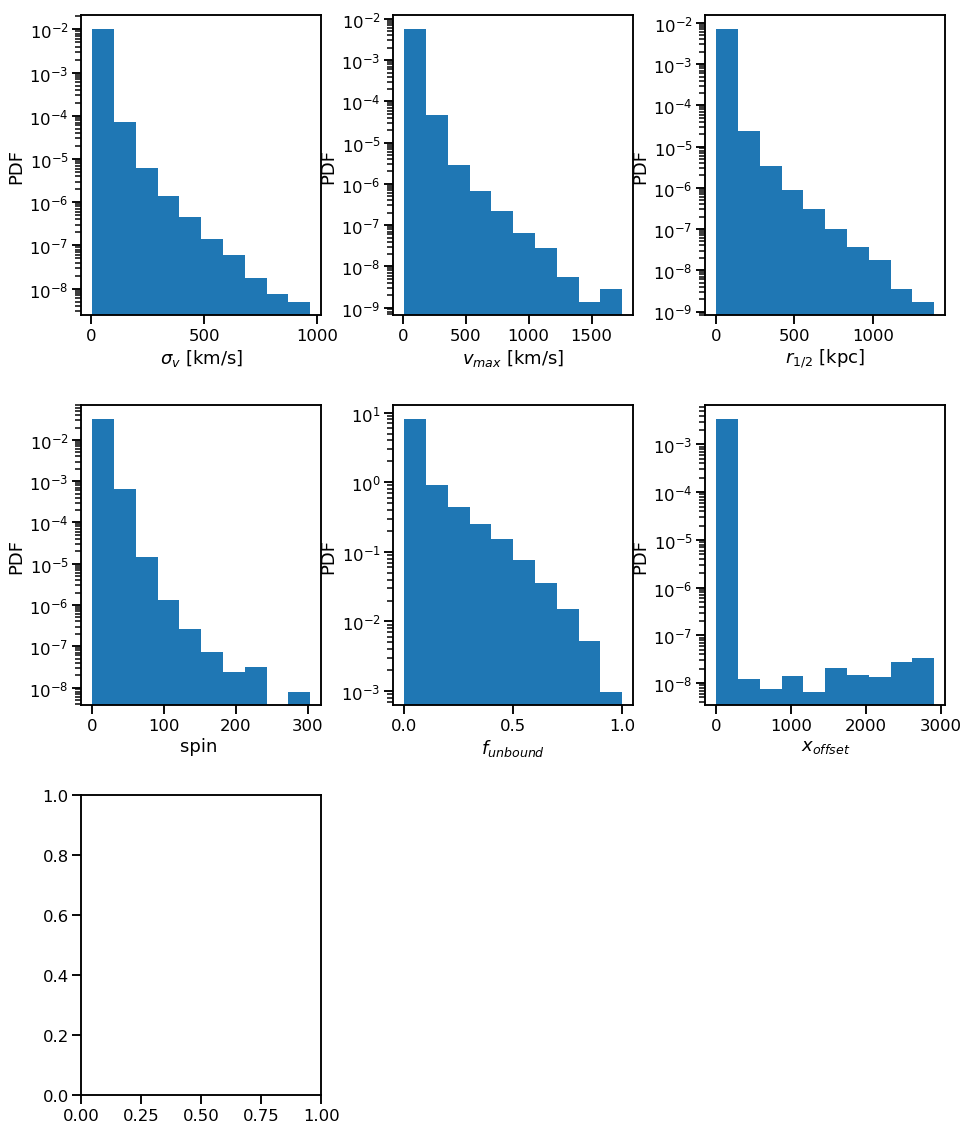

In [52]:
# Features histograms
fig,axes = plt.subplots(int((features.shape[1]-1)/3)+1,3,figsize=(60,30))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.3, top=0.6, wspace=0.3, hspace=0.3)
axes = axes.ravel()
for i in range(1, features.shape[1]):
    axes[i-1].hist(features[:,i], log=True, density=True)  
    axes[i-1].set_xlabel(features_names[i])
    axes[i-1].set_ylabel('PDF')
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

## Plot mean realtions with halo mass

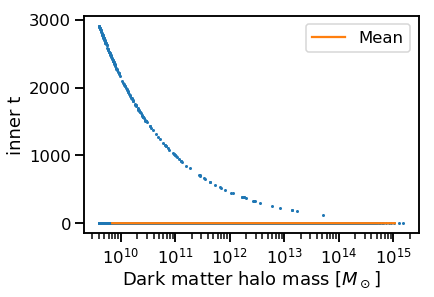

In [23]:
pt.plot_mean(halocat.m200c, halocat.x_offset,xlabel,ylabel, log=False)


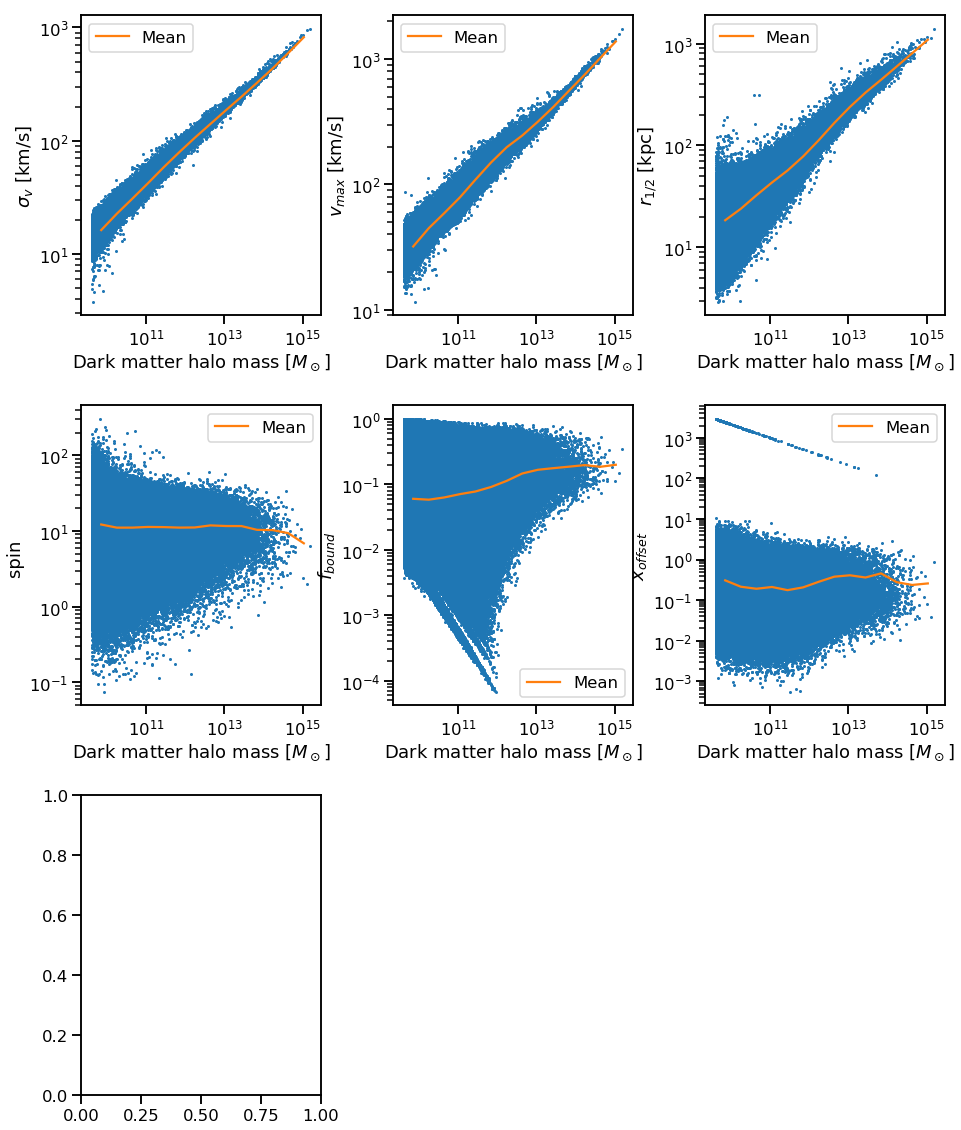

In [10]:
fig,axes = plt.subplots(int((features.shape[1]-1)/3)+1,3,figsize=(60,30))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.3, top=0.6, wspace=0.3, hspace=0.3)
axes = axes.ravel()
for i in range(1, features.shape[1]):
    ylabel = features_names[i]

    pt.plot_mean(halocat.m200c, features[:,i],xlabel,ylabel,axes=axes[i-1] )

fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

# Load precomputed features
## Halo shape

In [11]:
precomputed_dir = '/cosma6/data/dp004/dc-cues1/'
shapes_dir = precomputed_dir + 'shapes/TNG300-1/'

In [12]:
filename = 'L205n2500TNG_DMShape_099.hdf5'
shapes = h5py.File(shapes_dir + filename, 'r')

In [13]:
shape_masses = shapes['Group_M_Crit200'][:] *\
        1e10/halocat.snapshot.const.h
q  = shapes['fixedRshell/q'][:]
s  = shapes['fixedRshell/s'][:]
T  = shapes['fixedRshell/T'][:]

In [14]:
radius = [0.1,0.15,0.2,0.5,1.] # times the virial radius

In [15]:
d = {'mass': shape_masses}
for i, r in enumerate(radius):
    d.update({'q_%.2f'%r: q[:,i]})
    d.update({'s_%.2f'%r: s[:,i]})
    d.update({'T_%.2f'%r: T[:,i]})



In [16]:
df = pd.DataFrame(data=d)

In [17]:
df = df[df['mass'] > halocat.halo_mass_thresh]

In [18]:
assert df['mass'].shape[0] == halocat.N_halos

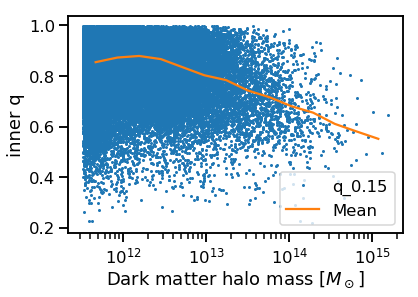

In [19]:
ylabel = 'inner q'
pt.plot_mean(df['mass'][df['q_0.15'] > 0.], 
             df['q_0.15'][df['q_0.15'] > 0.],
                xlabel,ylabel, log=False)


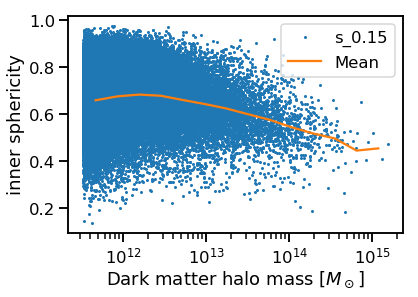

In [20]:
ylabel = 'inner sphericity'
pt.plot_mean(df['mass'][df['s_0.15'] > 0.], 
             df['s_0.15'][df['s_0.15'] > 0.],
                xlabel,ylabel, log=False)

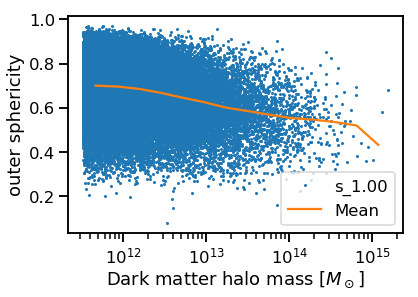

In [21]:
ylabel = 'outer sphericity'
pt.plot_mean(df['mass'][df['s_1.00'] > 0.], 
             df['s_1.00'][df['s_1.00'] > 0.],
                xlabel,ylabel, log=False)


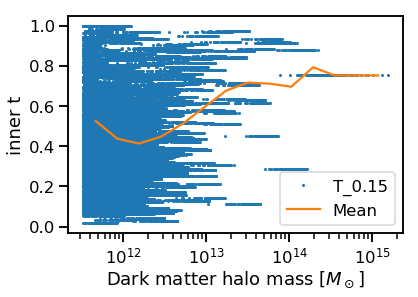

In [22]:
ylabel = 'inner t'
pt.plot_mean(df['mass'][df['T_0.15'] > 0.], 
             df['T_0.15'][df['T_0.15'] > 0.],
                xlabel,ylabel, log=False)

## Write pandas dataframe with all interesting features

In [43]:
df['vmax'] = halocat.vmax
df['vdisp'] = halocat.vdisp
df['rhalf'] = halocat.rhalf
df['spin'] = halocat.spin
df['funbound'] = halocat.fsub_unbound
df['offset'] = halocat.x_offset
df['StellarMass'] = halocat.M_stars

In [44]:
features_dir = '/cosma6/data/dp004/dc-cues1/features/'
df.to_hdf(features_dir + 'basic', key='df', mode='w')